## Test E-field inside bounded charges

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

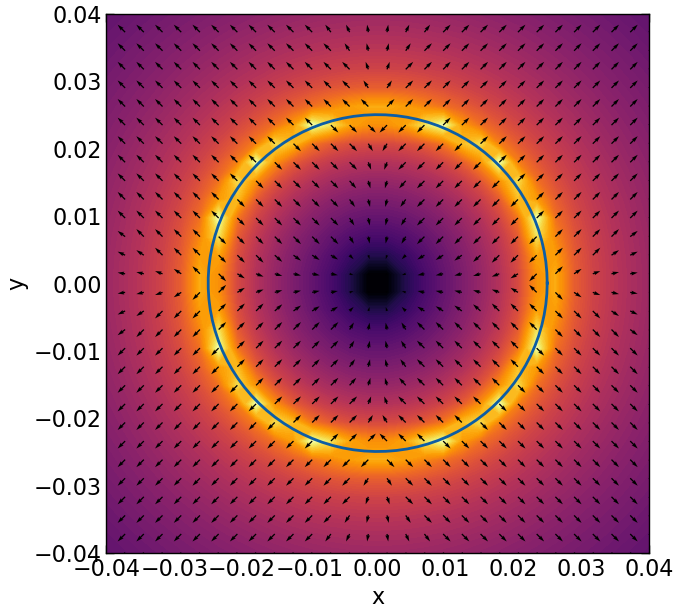

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

#หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

# ความหนาแน่นประจุ
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2.0 * pi * radius)
rho_l

x, y, t = smp.symbols('x y t')
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t), radius * smp.sin(t)])
R = r - rp

dqdt = rho_l * smp.diff(rp, t).norm()

#smp.integrate(dqdt, [t, 0, 2.0 * np.pi])

# หา dEdt
dEdt = dqdt / (4.0 * pi * epsilon_0) * R / R.norm()**3
#dEdt

# Integrate
#smp.integrate(dEdt, [t, 0, 2.0 * np.pi])

#Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * np.pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]
    return np.array([Ex, Ey])

#E(1, 2)

# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-4e-2, x_max=4e-2, y_min=-4e-2, y_max=4e-2, num_grids=30, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l = 2.5e-2 
x = l * np.cos(t)
y = l * np.sin(t)
plt.plot(x, y)
plt.show()

In [27]:
# ขนาดของสนามไฟฟ้า E บนแนวแกน x

x = np.linspace(-5e-2, 5e-2, 100)
y = np.zeros(len(x))

E_f = np.vectorize(E, signature='(),()->(n)')(x, y)

/var/folders/l3/kvkjl7ln6qjb36yvgbpzxllr0000gn/T/ipykernel_47635/2842714401.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]


In [45]:
E_norm = np.array([np.linalg.norm(E) for E in E_f])

Text(0, 0.5, '$|E(x, 0)|$')

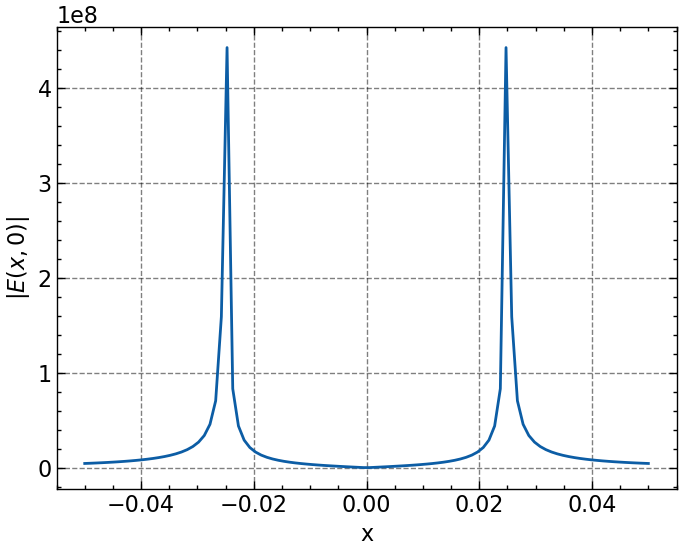

In [47]:
plt.plot(x, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0)|$')

## E-Field inside a hollowed spherical charge

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad

In [5]:
x, y, z = smp.symbols('x, y, z', real=True)
theta, phi = smp.symbols('theta, phi', real=True, pos=True)

radius = 1.0
r = smp.Matrix([x, y, z])
rp = smp.Matrix([radius * smp.sin(theta) * smp.cos(phi),\
                radius * smp.sin(theta) * smp.sin(phi),\
                radius * smp.cos(theta)])
R = r - rp
R

Matrix([
[x - 1.0*sin(theta)*cos(phi)],
[y - 1.0*sin(phi)*sin(theta)],
[         z - 1.0*cos(theta)]])

In [9]:
rho_s = 1.0
dq_dthetadphi = smp.diff(rp, theta).cross(smp.diff(rp, phi)).norm().simplify()
dq_dthetadphi

1.0*Abs(sin(theta))

In [10]:
dE_dthetadphi = dq_dthetadphi / (4.0 * pi * epsilon_0) * R / R.norm()**3
dE_dthetadphi

Matrix([
[8987551792.26117*(x - 1.0*sin(theta)*cos(phi))*Abs(sin(theta))/((x - 1.0*sin(theta)*cos(phi))**2 + (y - 1.0*sin(phi)*sin(theta))**2 + (z - 1.0*cos(theta))**2)**(3/2)],
[8987551792.26117*(y - 1.0*sin(phi)*sin(theta))*Abs(sin(theta))/((x - 1.0*sin(theta)*cos(phi))**2 + (y - 1.0*sin(phi)*sin(theta))**2 + (z - 1.0*cos(theta))**2)**(3/2)],
[         8987551792.26117*(z - 1.0*cos(theta))*Abs(sin(theta))/((x - 1.0*sin(theta)*cos(phi))**2 + (y - 1.0*sin(phi)*sin(theta))**2 + (z - 1.0*cos(theta))**2)**(3/2)]])

In [12]:
dExdt = smp.lambdify([theta, phi, x, y, z], dE_dthetadphi[0])
dEydt = smp.lambdify([theta, phi, x, y, z], dE_dthetadphi[1])
dEzdt = smp.lambdify([theta, phi, x, y, z], dE_dthetadphi[2])
dEzdt(2.5, 2.0, 1, 2, 3)

264891032.73819578

In [17]:
def E(x, y, z):
    Ex = dblquad(dExdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, z))[0]
    Ey = dblquad(dEydt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, z))[0]
    Ez = dblquad(dEzdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])

In [20]:
E(1, 2, 3)

array([2.15605193e+09, 4.31210386e+09, 6.46815579e+09])

In [28]:
X = np.linspace(-4, 4, 200)
Y = np.zeros(len(X))
Z = Y

E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

In [29]:
E_field.shape

(200, 3)

In [30]:
E_norm = np.array([np.linalg.norm(E) for E in E_field])

Text(0, 0.5, '$|E(x, 0, 0)|$')

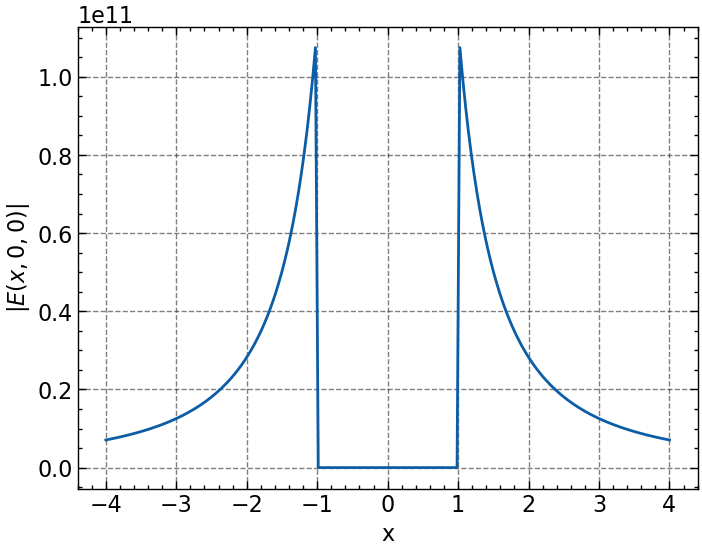

In [31]:
plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')

### Plot the field projection on the 2D plane

In [49]:
def E(x, y):
    Ex = dblquad(dExdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, 0))[0]
    Ey = dblquad(dEydt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, 0))[0]
    #Ez = dblquad(dEzdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, 0))[0]
    return np.array([Ex, Ey])
E(1, 2)

array([1.01017418e+10, 2.02034836e+10])

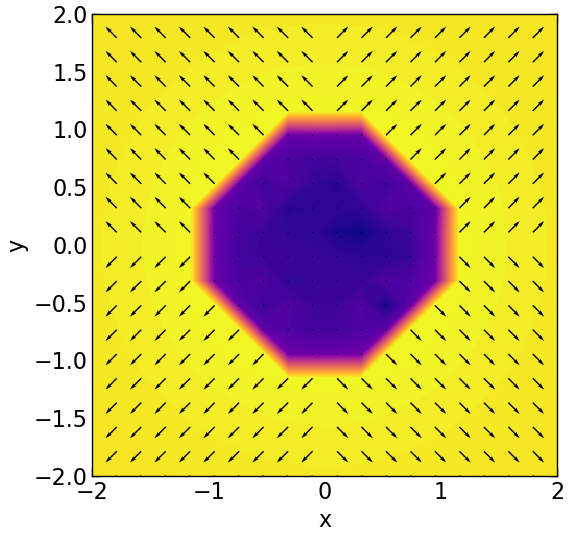

In [52]:
fig = plt.figure(figsize=(6, 6))
ax = field_plot(E, x_min=-2, x_max=2, y_min=-2, y_max=2, contour=True)